In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
# Step 2: Load the dataset
import pandas as pd

# Replace the path with your actual file name if different
df = pd.read_csv('C:\diabetes.csv\diabetes.csv')

# Display the first 5 rows
df.head()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Saurabh Bharale\AppData\Local\Temp\ipykernel_39604\761194941.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('C:\diabetes.csv\diabetes.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# Step 3: Exploratory Data Analysis (EDA)

# Basic info about the dataset
print("Dataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution (Outcome column)
print("\nClass Distribution:")
print(df['Outcome'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469   

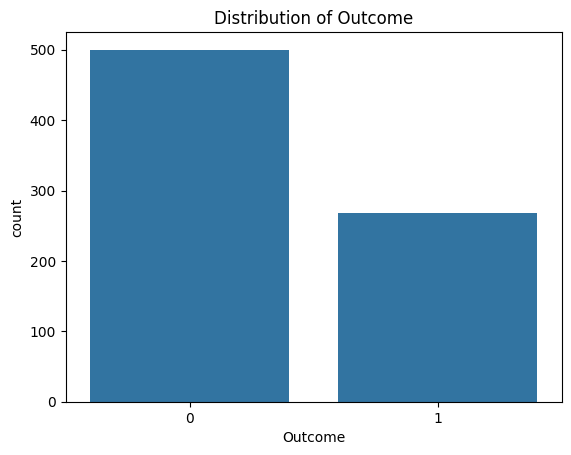

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for many ML models)
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [67]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (614, 8)
X_test_scaled shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [68]:
# Step 5: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [69]:
train_accuracy = model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.6498


In [70]:
# Step 6: Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Test Accuracy: 0.6364
Confusion Matrix:
[[98  1]
 [55  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.41      0.64      0.50       154



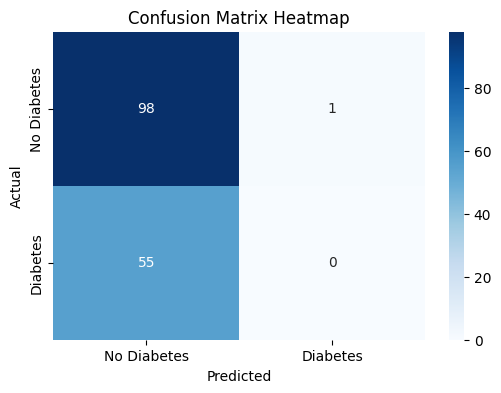

In [71]:
# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.64
Confusion Matrix:
 [[88 11]
 [45 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76        99
           1       0.48      0.18      0.26        55

    accuracy                           0.64       154
   macro avg       0.57      0.54      0.51       154
weighted avg       0.60      0.64      0.58       154



Accuracy: 0.6363636363636364


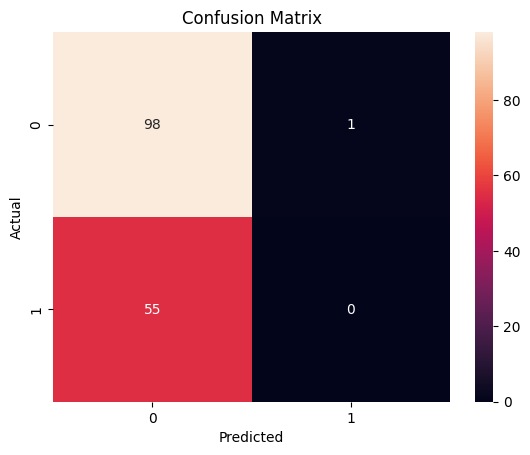

              precision    recall  f1-score   support

           0       0.64      0.99      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.41      0.64      0.50       154



In [73]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed Report
print(classification_report(y_test, y_pred))
